In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus


In [2]:
data=pd.read_csv('Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA and Visualization

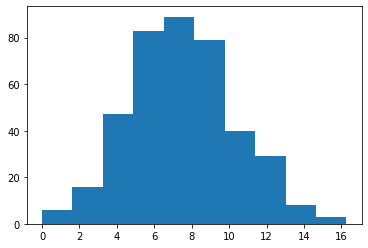

In [4]:
plt.hist(x=data['Sales'])
plt.show()

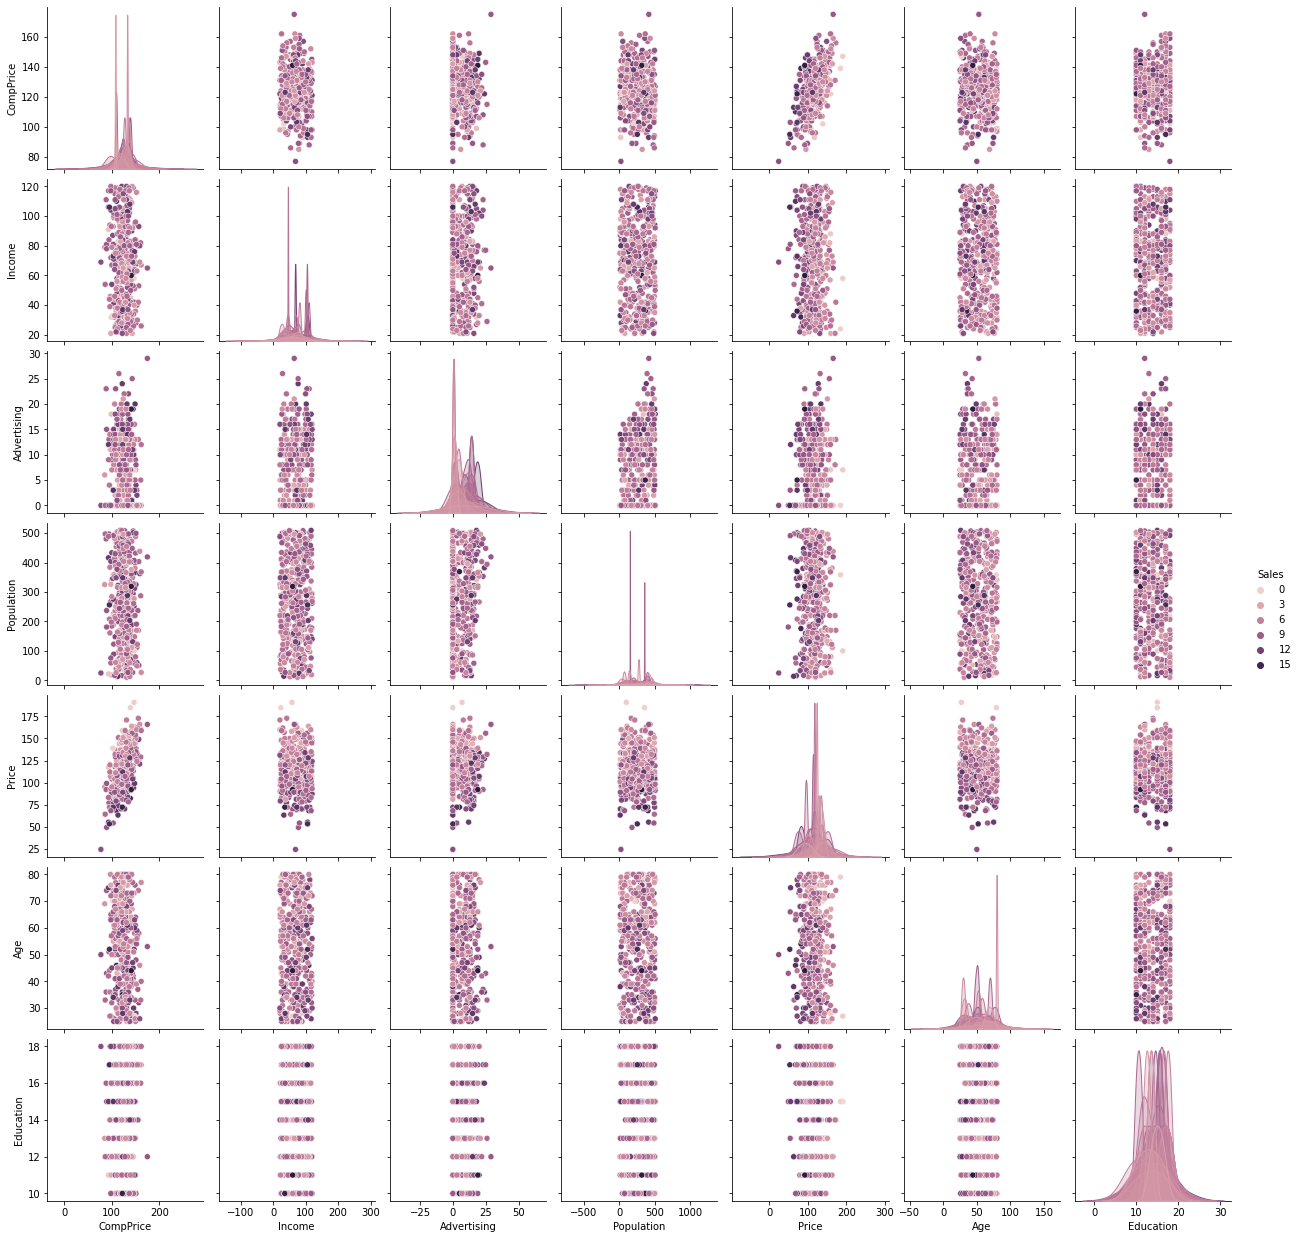

In [5]:
sns.pairplot(data=data, hue = 'Sales')

In [6]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [8]:
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [235]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [236]:
data['labels']=pd.cut(x=data['Sales'],bins=[0,6.5,9.3,17],labels=[0,1,2])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,labels
0,9.50,138,73,11,276,120,3,42,17,1,1,2
1,11.22,111,48,16,260,83,1,65,10,1,1,2
2,10.06,113,35,10,269,80,2,59,12,1,1,2
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,2
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1,0


In [237]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban_Yes         uint8
US_Yes            uint8
labels         category
dtype: object

In [238]:
data['labels'].value_counts()

0    151
1    145
2    103
Name: labels, dtype: int64

In [239]:
x_1= data.iloc[:,1:11]
y_1= data['labels']

# Normalization

In [240]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [241]:
x= norm_func(x_1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [242]:
le=LabelEncoder()
y=le.fit_transform(y_1)
y

array([2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 3, 1,
       0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2,
       0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1,

## Spliting Data

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

## Model

In [260]:
model = RF(n_estimators =100, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [275]:
model.classes_

array([0, 1, 2, 3])

In [274]:
model.n_classes_

4

In [264]:
model.n_outputs_

1

In [265]:
#model.oob_score_

# Prediction

In [266]:
##Prediction on test data
prediction = model.predict(x_test)

In [267]:
##Accuracy
acc_test =accuracy_score(y_test,prediction)
print(acc_test)


0.65


In [268]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,auc
from sklearn import metrics

In [269]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.54      0.50      0.52        30
           2       0.71      0.65      0.68        23

    accuracy                           0.65        80
   macro avg       0.65      0.66      0.65        80
weighted avg       0.65      0.65      0.65        80



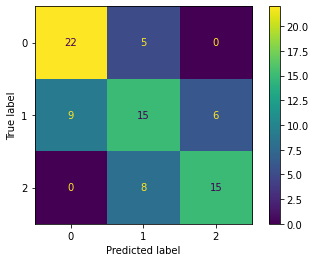

In [270]:
confu = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [271]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, prediction))
rms

0.5916079783099616

In [276]:
#In random forest we can plot a Decision tree present in Random forest


tree = model.estimators_[5]

dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = x.columns ,precision = 1)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [277]:

graph.write_pdf('companyrf.pdf')
graph.write_png('companyrf.png')

True

## On evaluating the above model we find that 
1. The F1 scores are the following: 

* 0-0.76
* 1-0.52
* 2-0.68


2. The Accuracy is 65%
3. The RMSE value is  0.59
## All the above parameters sugest that this is a good model